<a href="https://www.kaggle.com/code/maushamjha/flight-price-prediction-regression-98-45-r2-score?scriptVersionId=105427927" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# FLIGHT PRICE PREDICTION

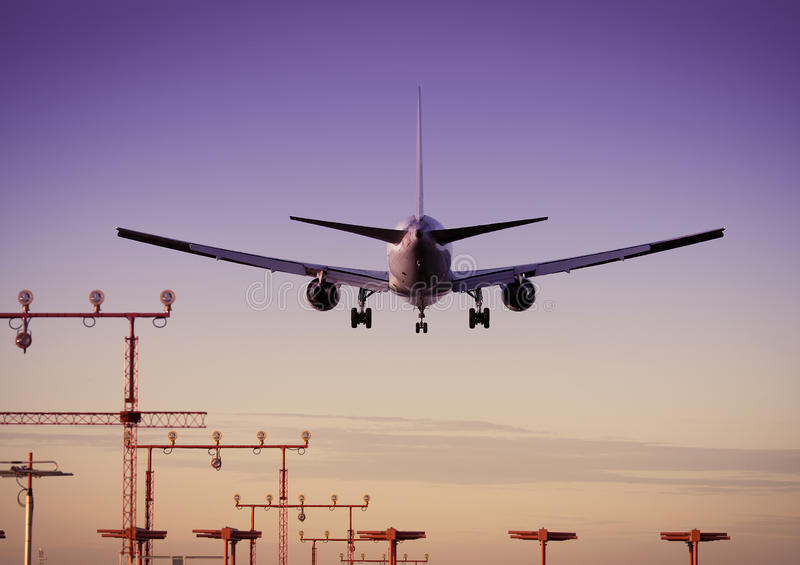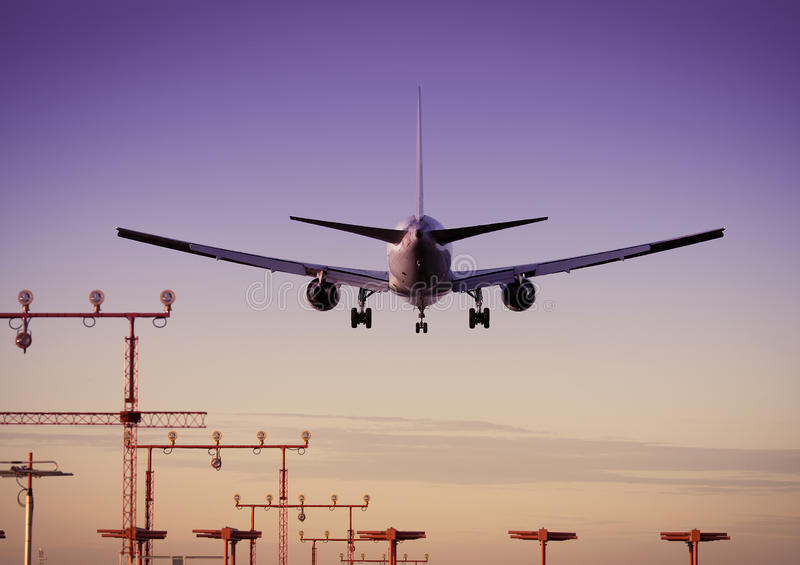

# About Dataset

# DATASET
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

## FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.


# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,PowerTransformer,StandardScaler
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import set_config
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data=pd.read_csv('../input/flight-price-prediction/Clean_Dataset.csv')

In [3]:
data.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [4]:
data.shape

(300153, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().sum()

0

# working on num_cat feature flight converting it into 2 columns one contain categorical value another contain numerical value

In [8]:
data['flight_name']=data['flight'].str.split('-').str[0]

In [9]:
data['flight_no']=data['flight'].str.split('-').str[1]

In [10]:
data.drop(columns='flight',axis=1,inplace=True)

In [11]:
data.head(2)

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_name,flight_no
0,0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709
1,1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157


## visualizations

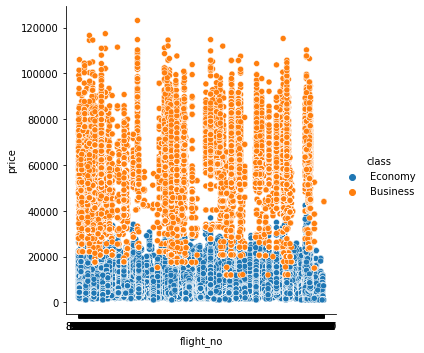

In [12]:
sns.relplot(x='flight_no',y='price',kind='scatter',hue='class',data=data)

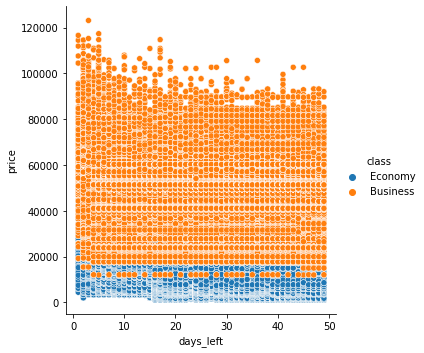

In [13]:
sns.relplot(x='days_left',y='price',kind='scatter',hue='class',data=data)

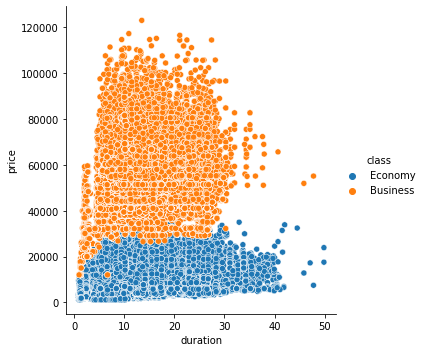

In [14]:
sns.relplot(x='duration',y='price',kind='scatter',hue='class',data=data)

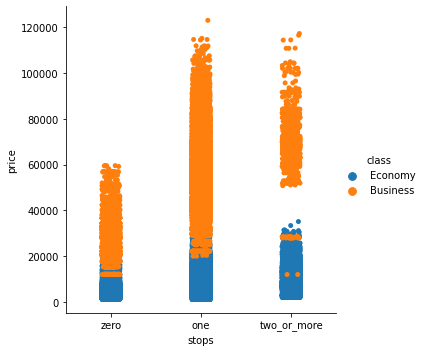

In [15]:
sns.catplot(x='stops',y='price',kind='strip',hue='class',jitter=1,data=data)

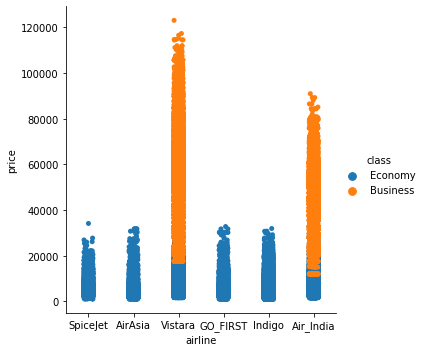

In [16]:
sns.catplot(x='airline',y='price',kind='strip',hue='class',jitter=1,data=data)

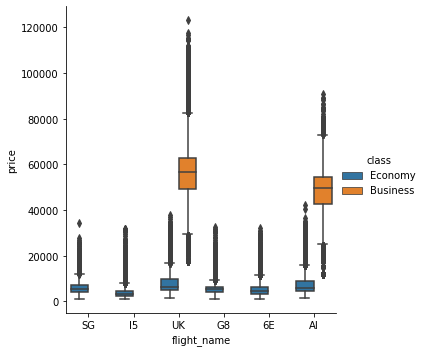

In [17]:
sns.catplot(x='flight_name',y='price',kind='box',hue='class',data=data)

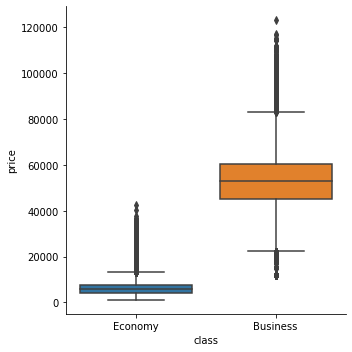

In [18]:
sns.catplot(x='class',y='price',kind='box',data=data)

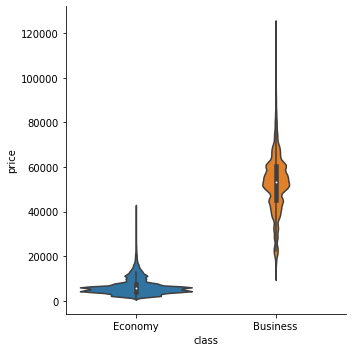

In [19]:
sns.catplot(x='class',y='price',kind='violin',data=data)

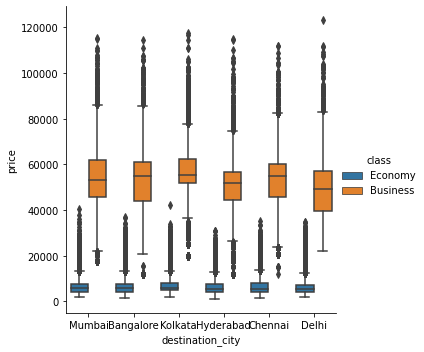

In [20]:
sns.catplot(x='destination_city',y='price',hue='class',kind='box',data=data)

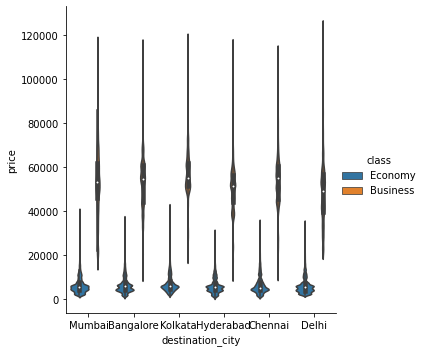

In [21]:
sns.catplot(x='destination_city',y='price',hue='class',kind='violin',data=data)

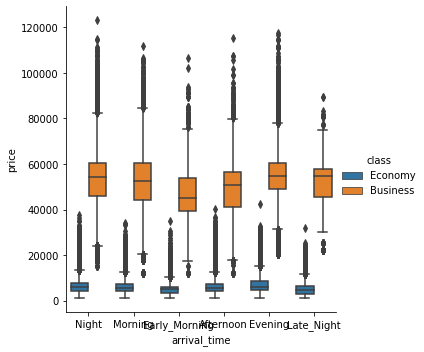

In [22]:
sns.catplot(x='arrival_time',y='price',hue='class',kind='box',data=data)

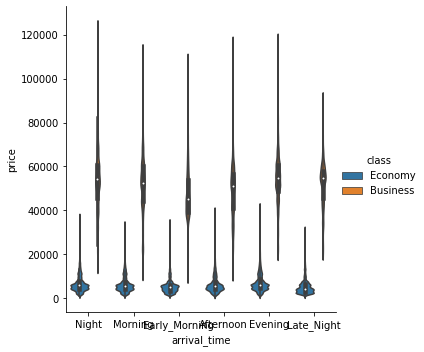

In [23]:
sns.catplot(x='arrival_time',y='price',hue='class',kind='violin',data=data)

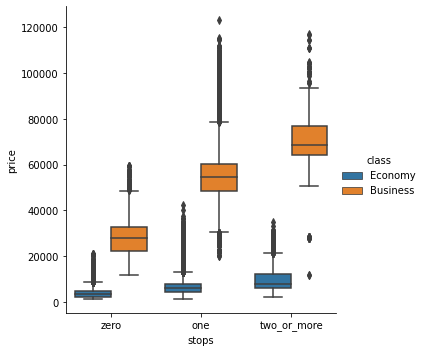

In [24]:
sns.catplot(x='stops',y='price',hue='class',kind='box',data=data)

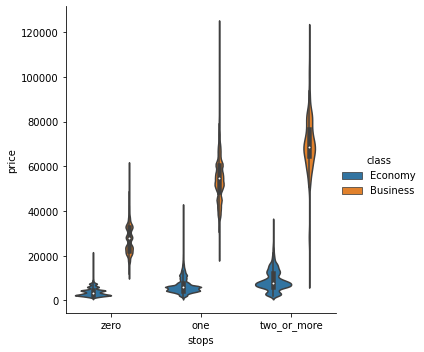

In [25]:
sns.catplot(x='stops',y='price',hue='class',kind='violin',data=data)

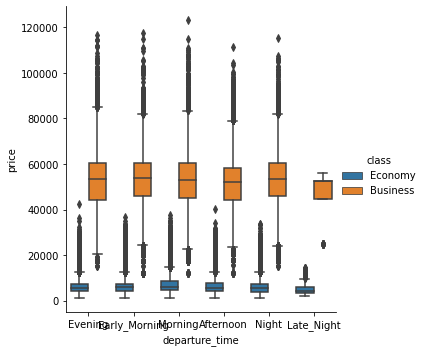

In [26]:
sns.catplot(x='departure_time',y='price',hue='class',kind='box',data=data)

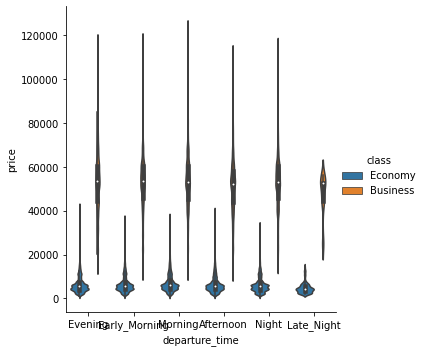

In [27]:
sns.catplot(x='departure_time',y='price',hue='class',kind='violin',data=data)

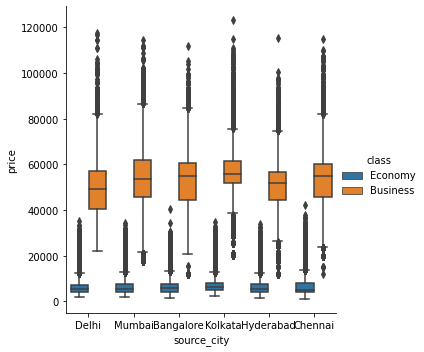

In [28]:
sns.catplot(x='source_city',y='price',hue='class',kind='box',data=data)

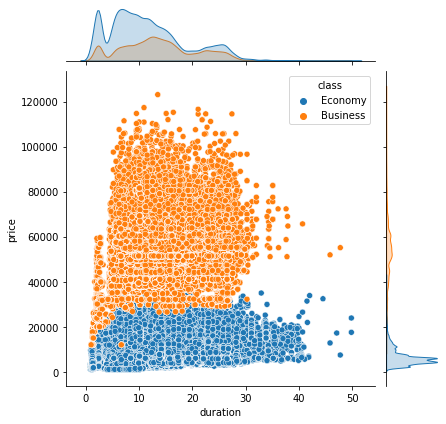

In [29]:
sns.jointplot(x='duration',y='price',kind='scatter',hue='class',data=data)

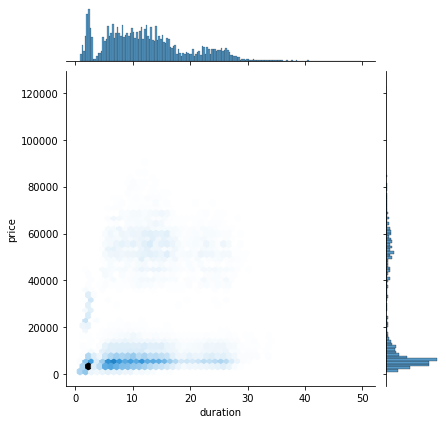

In [30]:
sns.jointplot(x='duration',y='price',kind='hex',data=data)

<AxesSubplot:xlabel='days_left'>

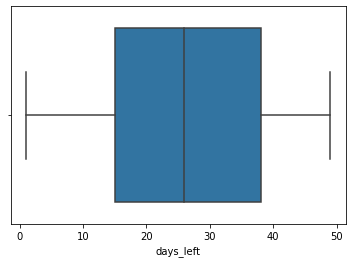

In [31]:
sns.boxplot(data['days_left'])

<AxesSubplot:xlabel='duration'>

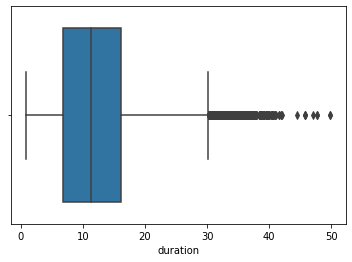

In [32]:
sns.boxplot(data['duration'])

<AxesSubplot:xlabel='flight_no', ylabel='Density'>

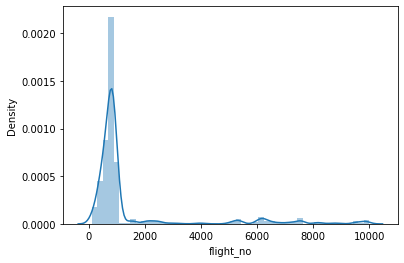

In [33]:
sns.distplot(data['flight_no'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

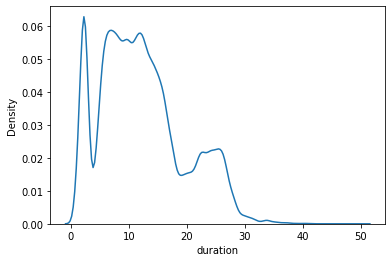

In [34]:
sns.distplot(data['duration'],hist=False)

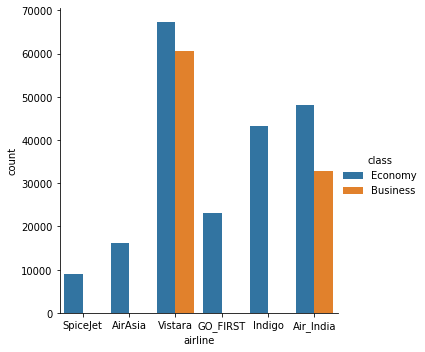

In [35]:
sns.catplot('airline',kind='count',hue='class',data=data)

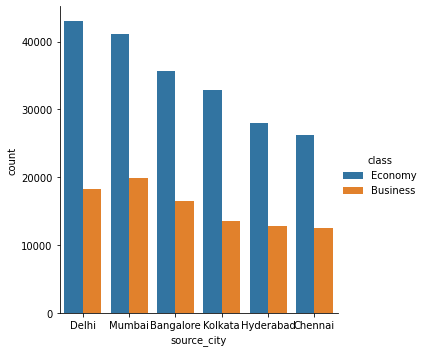

In [36]:
sns.catplot('source_city',kind='count',hue='class',data=data)

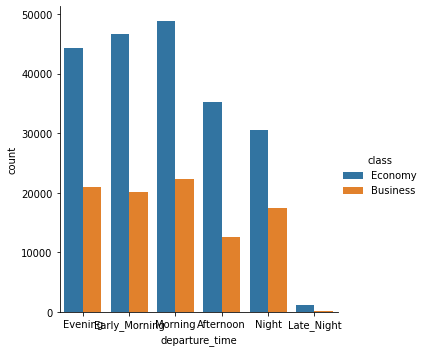

In [37]:
sns.catplot('departure_time',kind='count',hue='class',data=data)

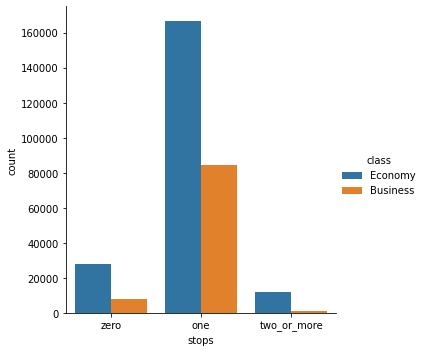

In [38]:
sns.catplot('stops',kind='count',hue='class',data=data)

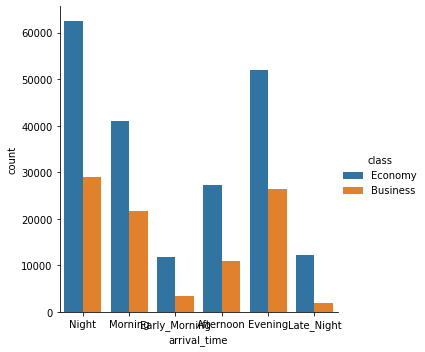

In [39]:
sns.catplot('arrival_time',kind='count',hue='class',data=data)

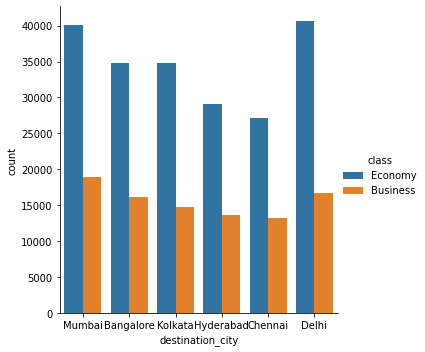

In [40]:
sns.catplot('destination_city',kind='count',hue='class',data=data)

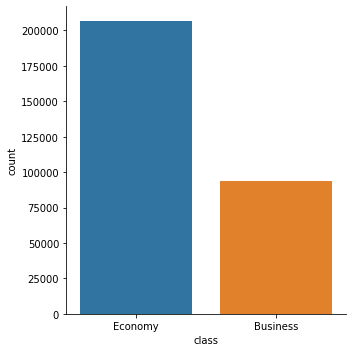

In [41]:
sns.catplot('class',kind='count',data=data)

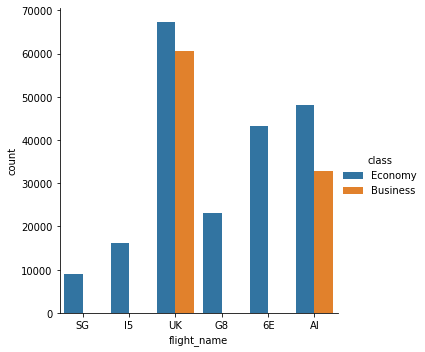

In [42]:
sns.catplot('flight_name',kind='count',hue='class',data=data)

## drop unwanted column

In [43]:
data.drop(columns=['Unnamed: 0','flight_name'],axis=1,inplace=True)

In [44]:
data.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'flight_no'],
      dtype='object')

# train test split

In [45]:
x=data.drop(columns=['price'],axis=1)
y=data['price']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [47]:
x_train.shape

(210107, 10)

In [48]:
y_train.shape

(210107,)

# column transformers : 
## encoding categorical columns and apply power transformer on numerical skewed columns

In [49]:
ct1=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),['airline','source_city','destination_city','class','departure_time','arrival_time']),
    ('oes',OrdinalEncoder(categories=[['zero','one','two_or_more']],handle_unknown='use_encoded_value',unknown_value=3),['stops']),
    ('pt',PowerTransformer(),['duration','flight_no']),
],remainder='passthrough')

## scalling

In [50]:
ct2=ColumnTransformer(transformers=[
    ('scaler',StandardScaler(),[8])
],remainder='passthrough')

## Model

In [51]:
ct3=RandomForestRegressor()

## Pipeline formation :

In [52]:
pipe=Pipeline([
    ('ct1',ct1),
    ('ct2',ct2),
    ('ct3',ct3)
])

## Training :

In [53]:
set_config(display='diagram')
pipe.fit(x_train,y_train)

Pipeline(steps=[('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['airline', 'source_city',
                                                   'destination_city', 'class',
                                                   'departure_time',
                                                   'arrival_time']),
                                                 ('oes',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two_or_more']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=3),
                                                  ['stops']),
                                                 ('pt', PowerTransformer(),
                                                  ['duration', 'flight_no'])])),
                ('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [8])])),
                ('ct3', RandomForestRegressor())])

In [54]:
y_predict=pipe.predict(x_test)

In [55]:
pipe.named_steps

{'ct1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  ['airline', 'source_city', 'destination_city',
                                   'class', 'departure_time', 'arrival_time']),
                                 ('oes',
                                  OrdinalEncoder(categories=[['zero', 'one',
                                                              'two_or_more']],
                                                 handle_unknown='use_encoded_value',
                                                 unknown_value=3),
                                  ['stops']),
                                 ('pt', PowerTransformer(),
                                  ['duration', 'flight_no'])]),
 'ct2': ColumnTransformer(rema

## Evaluation :

In [56]:
print('score_randomforest : ',r2_score(y_test,y_predict))

score_randomforest :  0.9845890258170908


# please upvote if You liked it